##Libraries

In [1]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data preprocessing
from sklearn.model_selection import train_test_split
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import numpy as np

##Text to Speech by Google

In [3]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from gtts import gTTS
  
import os

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600  ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d muhammadammarabid/pakistanicurrencydataset

 94% 161M/172M [00:01<00:00, 94.6MB/s]
100% 172M/172M [00:01<00:00, 109MB/s] 


In [ ]:
!unzip pakistanicurrencydataset.zip

Archive:  pakistanicurrencydataset.zip
  inflating: data-rescaled/1000_back/IMG20211228225452.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225453.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225456.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225459.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225502.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225504.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225507.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225510.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225514.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225518.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225519.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225523.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225525.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225527.jpg  
  inflating: data-rescaled/1000_back/IMG20211228225538.jpg  
  inflating: data-rescaled/1000_back/IMG202112

Move all the Images from folders [10_back,100_back] with back pics to the front [10_front,100_front]

In [ ]:
%mv /content/data-currency/50_back/**.jpg /content/data-currency/50_front

Remove the Empty Folders that is of back

In [ ]:
!rm -rf /content/data-currency/50_back

In [ ]:
%cp -av /content/drive/MyDrive/data-currency /content/

'/content/drive/MyDrive/data-currency' -> '/content/data-currency'
'/content/drive/MyDrive/data-currency/1000' -> '/content/data-currency/1000'
'/content/drive/MyDrive/data-currency/1000/IMG20211229235905.jpg' -> '/content/data-currency/1000/IMG20211229235905.jpg'
'/content/drive/MyDrive/data-currency/1000/IMG20211228231809.jpg' -> '/content/data-currency/1000/IMG20211228231809.jpg'
'/content/drive/MyDrive/data-currency/1000/IMG20211229235914.jpg' -> '/content/data-currency/1000/IMG20211229235914.jpg'
'/content/drive/MyDrive/data-currency/1000/IMG20211229235825.jpg' -> '/content/data-currency/1000/IMG20211229235825.jpg'
'/content/drive/MyDrive/data-currency/1000/IMG20211229001404.jpg' -> '/content/data-currency/1000/IMG20211229001404.jpg'
'/content/drive/MyDrive/data-currency/1000/IMG20211229234048.jpg' -> '/content/data-currency/1000/IMG20211229234048.jpg'
'/content/drive/MyDrive/data-currency/1000/IMG20211229235836.jpg' -> '/content/data-currency/1000/IMG20211229235836.jpg'
'/content

##Data Frame to get the Images and Labels

In [ ]:
## dataset path
path = Path(r'/content/data-currency')


# file path for all pngs -> to list png [1.png,2.png,.....]
file_path = list(path.glob(r'**/*.jpg'))

print('filepath: ',file_path)

# lambda function to get labels of images
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))


# path converted to pandas
file_path = pd.Series(file_path).astype(str)

labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)
#print(df)


df.columns = ['image', 'label']


df.tail(10)


filepath:  [PosixPath('/content/data-currency/500/IMG20211228233305.jpg'), PosixPath('/content/data-currency/500/IMG20211228122602.jpg'), PosixPath('/content/data-currency/500/IMG20220218161724.jpg'), PosixPath('/content/data-currency/500/IMG20211228104849.jpg'), PosixPath('/content/data-currency/500/IMG20211229232228.jpg'), PosixPath('/content/data-currency/500/IMG20211229231804.jpg'), PosixPath('/content/data-currency/500/IMG20211229231637.jpg'), PosixPath('/content/data-currency/500/IMG20211229232125.jpg'), PosixPath('/content/data-currency/500/IMG20211229231850.jpg'), PosixPath('/content/data-currency/500/IMG20211228222707.jpg'), PosixPath('/content/data-currency/500/IMG20211229231802.jpg'), PosixPath('/content/data-currency/500/IMG20211228233722.jpg'), PosixPath('/content/data-currency/500/IMG20211228233350.jpg'), PosixPath('/content/data-currency/500/IMG20211229231729.jpg'), PosixPath('/content/data-currency/500/IMG20220218161759.jpg'), PosixPath('/content/data-currency/500/IMG20

,image,label
3601,/content/data-currency/100/IMG20220212164118.jpg,100
3602,/content/data-currency/100/IMG20220218164139.jpg,100
3603,/content/data-currency/100/IMG20211229233054.jpg,100
3604,/content/data-currency/100/IMG20211230002653.jpg,100
3605,/content/data-currency/100/IMG20211228220203.jpg,100
3606,/content/data-currency/100/IMG20211229002651.jpg,100
3607,/content/data-currency/100/IMG20211229003045.jpg,100
3608,/content/data-currency/100/IMG20211230002750.jpg,100
3609,/content/data-currency/100/IMG20220212164027.jpg,100
3610,/content/data-currency/100/IMG20220212164204.jpg,100


#Train Test Split from the DataFrame

In [ ]:
x_train,x_val=train_test_split(df,test_size=0.2,random_state=30)

In [ ]:
x_train['label'].value_counts()

100     452
10      446
500     431
50      407
5000    405
20      388
1000    359
Name: label, dtype: int64

In [ ]:
print("Shape of training data", x_train.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (2888, 2)
Shape of validation data (723, 2)


##Augmentation of Images
Brightness range was due to the fluctuations of camera brightness when taking a picture

In [ ]:
image_data_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    brightness_range=(0.3,0.9),
    horizontal_flip=True
)
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 2888 validated image filenames belonging to 7 classes.
Found 723 validated image filenames belonging to 7 classes.


In [ ]:
#train.classes

In [ ]:
input_shape=(200,200,3)

##Model Architecture VGG Approach

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
#Adaptive Movement Estimation 

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
checkpoint_filepath = '/content/checkpoint'
callbackcheckpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_best_only=True
    )
callbackearly = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=150, callbacks=[callbackcheckpoint,callbackearly])

Epoch 1/150
91/91 [==============================] - 69s 626ms/step - loss: 4.0914 - accuracy: 0.1506 - val_loss: 1.9451 - val_accuracy: 0.1715
Epoch 2/150
91/91 [==============================] - 56s 612ms/step - loss: 1.9452 - accuracy: 0.1513 - val_loss: 1.9457 - val_accuracy: 0.1438
Epoch 3/150
91/91 [==============================] - 56s 616ms/step - loss: 1.9458 - accuracy: 0.1586 - val_loss: 1.9389 - val_accuracy: 0.1798
Epoch 4/150
91/91 [==============================] - 57s 626ms/step - loss: 1.9397 - accuracy: 0.1686 - val_loss: 1.9416 - val_accuracy: 0.1798
Epoch 5/150
91/91 [==============================] - 56s 611ms/step - loss: 1.9320 - accuracy: 0.1783 - val_loss: 1.9307 - val_accuracy: 0.1438
Epoch 6/150
91/91 [==============================] - 58s 635ms/step - loss: 1.9203 - accuracy: 0.1870 - val_loss: 1.9120 - val_accuracy: 0.1674
Epoch 7/150
91/91 [==============================] - 55s 608ms/step - loss: 1.9087 - accuracy: 0.2012 - val_loss: 1.9104 - val_accuracy:

Save the Model

In [ ]:
model.save('Pakistan_Currency_Classification.h5')
#model = keras.models.load_model('model-1.h5')

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

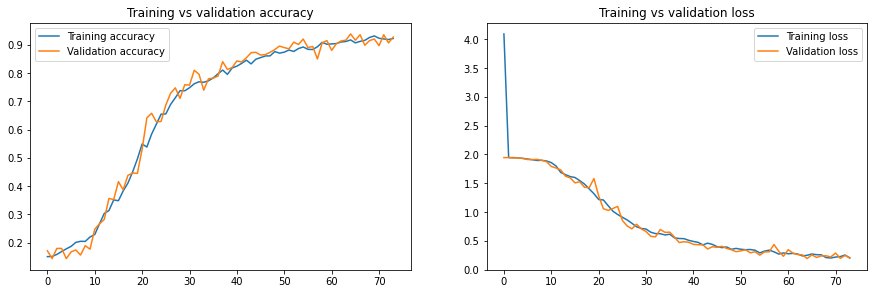

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [5]:
%cp -av /content/drive/MyDrive/Pakistan_Currency_Classification.h5 /content/

'/content/drive/MyDrive/Pakistan_Currency_Classification.h5' -> '/content/Pakistan_Currency_Classification.h5'


In [6]:
from tensorflow import keras
model = keras.models.load_model('/content/Pakistan_Currency_Classification.h5')

In [ ]:
y_pred=model.predict(val)

In [ ]:
y_pred.shape

(723, 7)

In [ ]:
val

# Labels
10 100 1000 20 50 500 5000

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(df['image'],df['label'],test_size=0.2,random_state=30)

In [ ]:
X_test.shape

(723,)

In [ ]:
val

##Classification and Confusion matrics for model evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
target_names = ['10', '100','1000', '20', '50', '500', '5000']

In [ ]:
x_val.label

3358     500
629      100
1014     100
323       50
3238     500
        ... 
1820    1000
1060    5000
2509      20
2840      10
612      100
Name: label, Length: 723, dtype: object

In [ ]:
index_max = np.argmax(y_pred[0])
print(index_max)

1


In [ ]:
y_pred[0]

array([2.7621611e-06, 9.9999464e-01, 5.9438191e-13, 5.3717304e-07,
       1.8731881e-06, 7.9749801e-12, 6.7191181e-08], dtype=float32)

In [ ]:
y_test.iloc[0]

'100'

##Prediction
Use the prediction for getting the max output of the index through softmax and calculate the according label to it

In [ ]:
from operator import index
def label_of_prediction(y_pred,i):
    index_max = np.argmax(y_pred[i])
    if index_max==0:
      return '10'
    elif index_max==1:
      return '100'
    elif index_max==2:
      return '1000'
    elif index_max==3:
      return '20'
    elif index_max==4:
      return '50'
    elif index_max==5:
      return '500'
    elif index_max==6:
      return '5000'

##Custom Evaluation

In [ ]:
y_label=[]
for i in range(0,len(y_pred)):
  print('Label_of_Prediction',label_of_prediction(y_pred,i))
  y_label.append(label_of_prediction(y_pred,i))
  print('y_test',y_test.iloc[i])
  print('y_label',y_label)
  if y_test.iloc[i]==y_label[i]:
    print('Prediction is True')
  else:
    print('Prediction is False')

Label_of_Prediction 100
y_test 100
y_label ['100']
Prediction is True
Label_of_Prediction 10
y_test 10
y_label ['100', '10']
Prediction is True
Label_of_Prediction 10
y_test 10
y_label ['100', '10', '10']
Prediction is True
Label_of_Prediction 500
y_test 500
y_label ['100', '10', '10', '500']
Prediction is True
Label_of_Prediction 100
y_test 100
y_label ['100', '10', '10', '500', '100']
Prediction is True
Label_of_Prediction 500
y_test 500
y_label ['100', '10', '10', '500', '100', '500']
Prediction is True
Label_of_Prediction 1000
y_test 1000
y_label ['100', '10', '10', '500', '100', '500', '1000']
Prediction is True
Label_of_Prediction 1000
y_test 1000
y_label ['100', '10', '10', '500', '100', '500', '1000', '1000']
Prediction is True
Label_of_Prediction 100
y_test 100
y_label ['100', '10', '10', '500', '100', '500', '1000', '1000', '100']
Prediction is True
Label_of_Prediction 20
y_test 20
y_label ['100', '10', '10', '500', '100', '500', '1000', '1000', '100', '20']
Prediction is Tru

##Confusion Matrix

In [ ]:
confusion_matrix(list(y_test), y_label, labels=['10', '100', '1000','20','50','500','5000'])

array([[ 97,   1,   0,   2,   1,   0,   0],
       [  0, 108,   0,   1,   0,   0,   0],
       [  0,   0, 103,   0,   1,   0,   0],
       [  0,   5,   0, 107,   0,   0,   6],
       [  0,   0,   0,   0,  86,   0,   0],
       [  2,   0,   1,   0,   0,  89,   0],
       [  0,   1,   0,   0,   1,   0, 111]])

##Classification Report 

In [ ]:
print(classification_report(list(y_test), y_label, target_names=target_names))

              precision    recall  f1-score   support

          10       0.98      0.96      0.97       101
         100       0.94      0.99      0.96       109
        1000       0.99      0.99      0.99       104
          20       0.97      0.91      0.94       118
          50       0.97      1.00      0.98        86
         500       1.00      0.97      0.98        92
        5000       0.95      0.98      0.97       113

    accuracy                           0.97       723
   macro avg       0.97      0.97      0.97       723
weighted avg       0.97      0.97      0.97       723



##Testing using Images

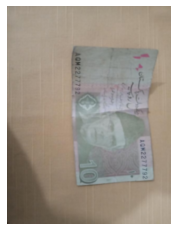

The softmax of the labels are [1. 0. 0. 0. 0. 0. 0.]


In [34]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.image as mpimg
result=0
def load_image(filename):
	img = load_img(filename, target_size=(200, 200))
	img = img_to_array(img)
	img = img.reshape(1, 200, 200, 3)
	img = img.astype('float32')
	return img
 
def run_example():
  img = load_image('/content/Image.jpg')
  img2 = mpimg.imread('/content/Image.jpg')
  imgplot = plt.imshow(img2)
  plt.axis('off')
  plt.show()
  result = model.predict(img)
  print('The softmax of the labels are',result[0])
  return result[0]
result=run_example()

##Give the Proper label through comparing the output

In [35]:
index_max = np.argmax(result)
if index_max==0:
   mytext= '10'
elif index_max==1:
   mytext= '100'
elif index_max==2:
   mytext= '1000'
elif index_max==3:
   mytext= '20'
elif index_max==4:
   mytext= '50'
elif index_max==5:
   mytext= '500'
elif index_max==6:
   mytext= '5000'

In [36]:
print('The Predicted Image is of',mytext)

The Predicted Image is of 10


##Text to Speech

In [ ]:
mytext = mytext+'Rupees'
  
language = 'en'
  
myobj = gTTS(text=mytext, lang=language, slow=True)
  
myobj.save(mytext+".mp3")
